# Abundâncias solares: Asplund et al. (2021, A&A, 653, A141)

## Gerando o arquivo com os dados

In [1]:
%%writefile solar_abundances.txt
# Solar Photospheric Abundances. When photospheric abundances were not present, meteoritic abundances were adopted, except for He (helioseismology).
# M. Asplund, A. M. Armasi, N. Grevesse https://ui.adsabs.harvard.edu/abs/2021A%26A...653A.141A/abstract
# Mean atomic weights from 2001 IUPAC table: www.chem.qmul.ac.uk/iupac/AtWt/
# Z El  A_Sun  atomic_wt
 1 H   12.00    1.00794
 2 He  10.91    4.002602
 3 Li   0.96    6.941
 4 Be   1.38    9.012182
 5 B    2.70   10.811
 6 C    8.46   12.0107
 7 N    7.83   14.0067
 8 O    8.69   15.9994
 9 F    4.40   18.9984032
10 Ne   8.06   20.1797
11 Na   6.22   22.989770
12 Mg   7.55   24.3050
13 Al   6.43   26.981538
14 Si   7.51   28.0855
15 P    5.41   30.973761
16 S    7.12   32.065
17 Cl   5.31   35.453
18 Ar   6.38   39.948
19 K    5.07   39.0983
20 Ca   6.30   40.078
21 Sc   3.14   44.955910
22 Ti   4.97   47.867
23 V    3.90   50.9415
24 Cr   5.62   51.9961
25 Mn   5.42   54.938049
26 Fe   7.46   55.845
27 Co   4.94   58.933200
28 Ni   6.20   58.6934
29 Cu   4.18   63.546
30 Zn   4.56   65.409
31 Ga   3.02   69.723
32 Ge   3.62   72.64
33 As   2.30   74.92160
34 Se   3.34   78.96
35 Br   2.54   79.904
36 Kr   3.12   83.798
37 Rb   2.32   85.4678
38 Sr   2.83   87.62
39 Y    2.21   88.90585
40 Zr   2.59   91.224
41 Nb   1.47   92.90638
42 Mo   1.88   95.94
44 Ru   1.75   101.07
45 Rh   0.78   102.90550
46 Pd   1.57   106.42
47 Ag   0.96   107.8682
48 Cd   1.71   112.411
49 In   0.80   114.818
50 Sn   2.02   118.710
51 Sb   1.01   121.760
52 Te   2.18   127.60
53 I    1.55   126.90447
54 Xe   2.22   131.293
55 Cs   1.08   132.90545
56 Ba   2.27   137.327
57 La   1.11   138.9055
58 Ce   1.58   140.116
59 Pr   0.75   140.90765
60 Nd   1.42   144.24
62 Sm   0.95   150.36
63 Eu   0.52   151.964
64 Gd   1.08   157.25
65 Tb   0.31   158.92534
66 Dy   1.10   162.500
67 Ho   0.48   164.93032
68 Er   0.93   167.259
69 Tm   0.11   168.93421
70 Yb   0.85   173.04
71 Lu   0.10   174.967
72 Hf   0.85   178.49
73 Ta  -0.15   180.9479
74 W    0.79   183.84
75 Re   0.26   186.207
76 Os   1.35   190.23
77 Ir   1.32   192.217
78 Pt   1.61   195.078
79 Au   0.91   196.96655
80 Hg   1.17   200.59
81 Tl   0.92   204.3833
82 Pb   1.95   207.2
83 Bi   0.65   208.98038
90 Th   0.03   232.0381
92 U   -0.54   238.02891

Overwriting solar_abundances.txt


## Plot abundância vs. número atômico (Z)

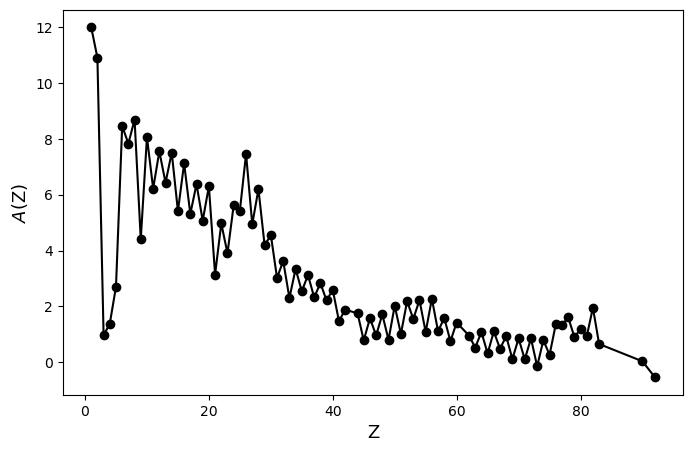

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("solar_abundances.txt", skip_header=3)

z = data[:,0]
eps = data[:,2]

plt.figure(figsize=(8,5))
plt.plot(z, eps, marker='o', linestyle='-', color='k')
plt.xlabel('Z', fontsize=13)
plt.ylabel(r'$A$(Z)', fontsize=13)
plt.show()

## Cálculo de frações de massa Y e Z: eqs. (1.7) e (1.8)

Eq. (1.7):
$Y = \frac{4 (n_\text{He}/n_\text{H})}{1 + 4 (n_\text{He}/n_\text{H})+ \sum A_i (n_i/n_\text{H})}$

Eq. (1.8):
$Z = \frac{\sum A_i (n_i/n_\text{H})}{1 + 4 (n_\text{He}/n_\text{H})+ \sum A_i (n_i/n_\text{H})}$

Além disso, da eq. (1.2), temos que $\frac{n_\text{X}}{n_\text{H}} = 10^{-12} \; 10^{\epsilon(\text{X})}$

In [ ]:
eps_he = eps[1] # Abundância de He

n_he_h = 1e-12 * 10**eps[1] # n_He/n_H

# Número de massa:
a = data[:,3]

sum = 0
for i in range(2, len(eps), 1):
  sum += a[i] * 1e-12 * 10**eps[i]

denom = 1 + 4*(n_he_h) + sum # Denominador de ambas as equações

y = (4 * n_he_h) / denom

print("Y = ", y)

1.3439511033761093
Y =  0.014002664876121562


## Desafios

1 -) Calcular a fração de massa do O

2-) Plot de fração de massa de todos os elementos vs. Z

### 1. Fração de massa do Oxigênio ($f_\text{O}$) é dada por:

$f_\text{O} = \frac{n_\text{O}m_\text{O}}{n_\text{H}m_\text{H}+n_\text{He}m_\text{He}+ \sum n_im_i} \approx \frac{16\frac{n_\text{O}}{n_\text{H}}}{1+ 4\frac{n_\text{He}}{n_\text{H}} + \sum \text{A}_i\frac{n_i}{n_\textrm{H}}}$

onde o termo 16 aparece no numerador via a aproximação $m_\text{O}/m_\text{H} \approx 16$. Portanto o denominador calculado anteriormente permanece igual e utilizando a equação 1.2 temos que:

In [4]:
eps_o=eps[7]
n_o_h = 1e-12 * 10**eps_o
print(n_o_h)
f_o= (16*n_o_h)/denom
print(r'Fração de massa de oxigênio =',f_o)


0.0004897788193684457
Fração de massa de oxigênio = 0.005830912367428646


### 2. Plot de fração de massa de todos elementos versus número atômico
O denominador continua sendo o mesmo e generalizamos a equação 1.7:

$f_\text{x} = \frac{n_\text{x}m_\text{x}}{n_\text{H}m_\text{H}+n_\text{He}m_\text{He}+ \sum n_im_i} = \frac{\frac{m_\text{x}}{m_\text{H}}\frac{n_\text{x}}{n_\text{H}}}{1+ 4\frac{n_\text{He}}{n_\text{H}} + \sum \text{A}_i\frac{n_i}{n_\textrm{H}}}$

0.7440746895388698 0.2401730423100201


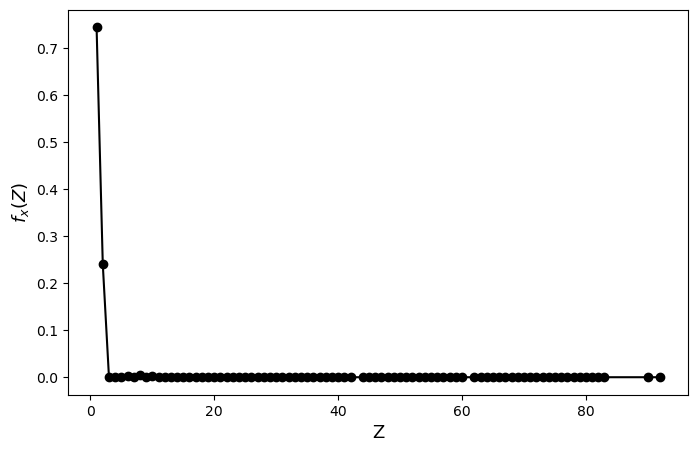

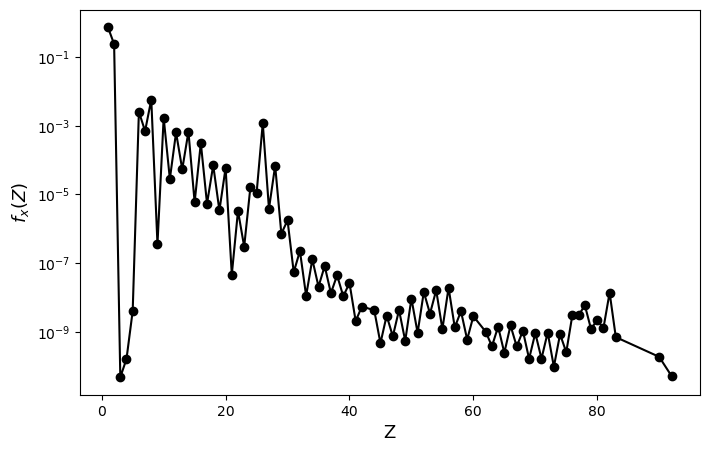

In [5]:
n_x_h = 1e-12 * 10**eps
a_x_h= a/a[0]
f_x= (a_x_h*n_x_h)/denom

print(f_x[0], f_x[1])

plt.figure(figsize=(8,5))
plt.plot(z, f_x, marker='o', linestyle='-', color='k')
plt.xlabel('Z', fontsize=13)
plt.ylabel(r'$f_x(Z)$', fontsize=13)
plt.show()


plt.figure(figsize=(8,5))
plt.plot(z, f_x, marker='o', linestyle='-', color='k')
plt.xlabel('Z', fontsize=13)
plt.ylabel(r'$f_x(Z)$', fontsize=13)
plt.yscale('log')
plt.show()




# Geneva-Copenhagen survey (GCS): ajuste [Fe/H] vs. excentricidade

Dados disponíveis em: https://cdsarc.cds.unistra.fr/viz-bin/cat/J/A+A/530/A138 (mas a tabela usada aqui foi modificada, excluindo NaNs e ajustando a formatação para ficar mais fácil de lidar no Python)

Como o arquivo é grande, é melhor fazer upload no drive e montar o drive no Colab

Vamos fazer um plot de metalicidade vs. excentricidade da órbita Galáctica

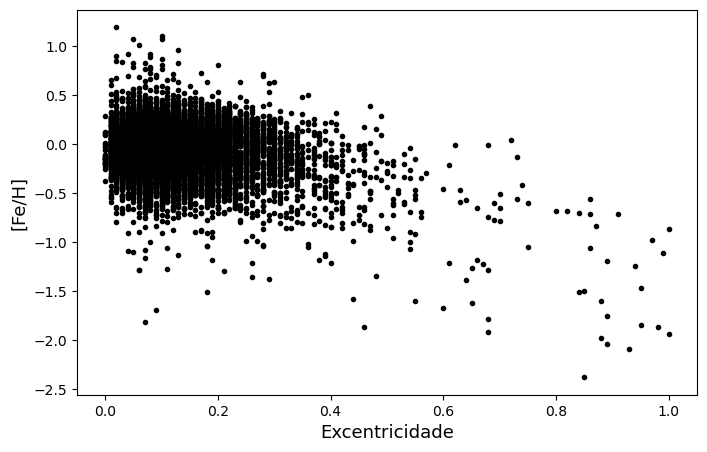

In [6]:
import pandas as pd

data_cgs = pd.read_csv("catalog_gcs.csv")

feh = data_cgs["[Fe/H]"]
exc = data_cgs["ecc"]

plt.figure(figsize=(8,5))
plt.plot(exc, feh, marker='.', linestyle='', color='k')
plt.xlabel('Excentricidade', fontsize=13)
plt.ylabel('[Fe/H]', fontsize=13)
plt.show()

## Ajuste linear

Definição da função que queremos ajustar:

In [7]:
def linear(x, a, b):
  return a*x + b

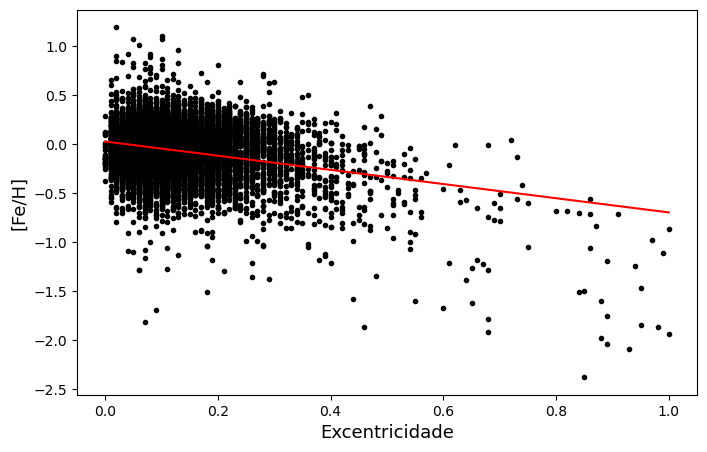

In [8]:
## Ajuste

a, b = np.polyfit(exc, feh, 1)
x = np.arange(0,1, 0.0001)
fit = linear(x, a, b)

plt.figure(figsize=(8,5))
plt.plot(exc, feh, marker='.', linestyle='', color='k')
plt.plot(x, fit, linestyle='-', color='red')
plt.xlabel('Excentricidade', fontsize=13)
plt.ylabel('[Fe/H]', fontsize=13)
plt.show()


## Desafio: ajuste com polinômio quadrático

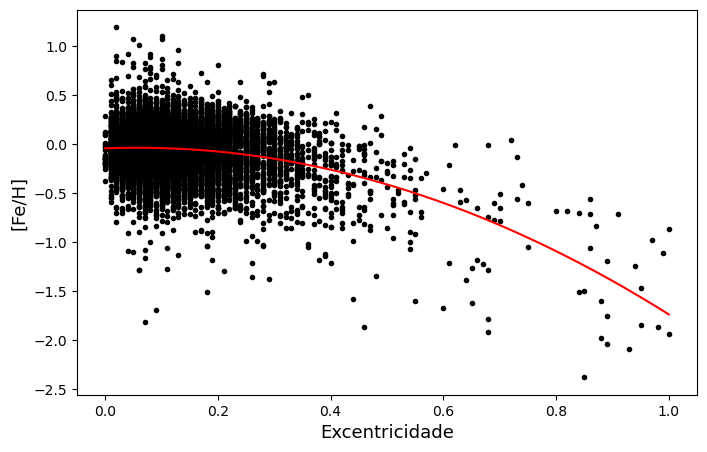

In [9]:
## Ajuste

def quadradtico (x, a,b,c):
  return a*x**2 + b*x + c

a, b, c = np.polyfit(exc, feh,2)
x = np.arange(0,1, 0.0001)
fit = quadradtico(x, a, b, c)

plt.figure(figsize=(8,5))
plt.plot(exc, feh, marker='.', linestyle='', color='k')
plt.plot(x, fit, linestyle='-', color='red')
plt.xlabel('Excentricidade', fontsize=13)
plt.ylabel('[Fe/H]', fontsize=13)
plt.show()

### Problema adicional: Diamond Planets

In [10]:
def check_diamond_planets(nc, no):
    print(nc/no)
    if (nc/no > 0.8): return "Yes"
    else: return "No"
# The Sun
eps_c=eps[5]
eps_o=eps[7]
nc_sun=10**(-12+eps_c) #Convertendo de abundância para número de átomos
no_sun=10**(-12+eps_o) 
print(nc_sun, no_sun)
check_diamond_planets(nc_sun,no_sun)



0.00028840315031266115 0.0004897788193684457
0.5888436553555907


'No'

In [11]:
#HD 75732
c_h=0.3
o_h=0.07
print(np.log10(no_sun))
check_diamond_planets(nc_sun*(10**(c_h)),no_sun*(10**(o_h)))

-3.3100000000000005
1.000000000000003


'Yes'

In [12]:
#HD 75732 (revised)
eps_c=8.73
eps_o=8.92
nc=10**(-12+eps_c) #Convertendo de abundância para número de átomos
no=10**(-12+eps_o) 
print(np.log10(nc), np.log10(no))
nc=10**(np.log10(nc))
no=10**(np.log10(no))
print(nc,no)
check_diamond_planets(nc,no)

-3.2699999999999996 -3.08
0.0005370317963702533 0.0008317637711026709
0.6456542290346563


'No'

## Problema adicional: [N/O] vs. A(O)

-0.8599999999999994


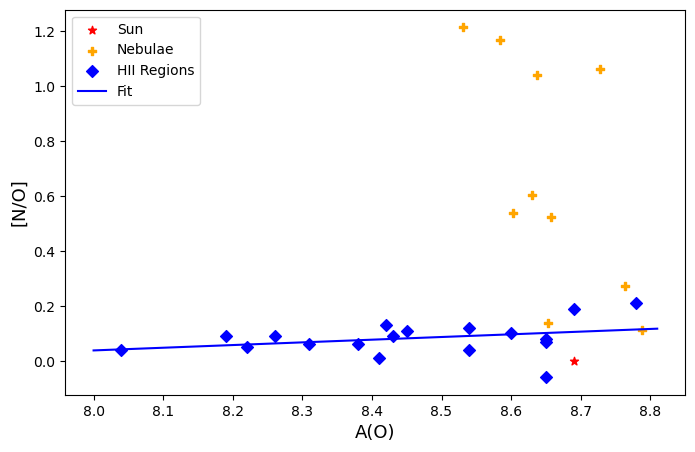

In [13]:
def get_n_o_ratio (a_n, a_o):
    n_n=10**(-12)*10**(a_n)
    n_o=10**(-12)*10**(a_o)
    return np.log10(n_n/n_o) - np.log10(n_o_ratio_sun)
#Sun
eps_o_sun=eps[7]
eps_n_sun=eps[6]
nn_sun=10**(-12+eps_n_sun) #Convertendo de abundância para número de átomos
no_sun=10**(-12+eps_o_sun) 
n_o_ratio_sun=nn_sun/no_sun
print(np.log10(n_o_ratio_sun))

#Nebulae
nebulae=pd.read_csv("nebula.csv", names=['name', 'n_n/n_h 10exp4', 'n_o/n_h 10exp4'])
eps_o_nebulae=np.log10(np.array(nebulae['n_o/n_h 10exp4'])/1e4) +12
eps_n_nebulae=np.log10(np.array(nebulae['n_n/n_h 10exp4'])/1e4) +12
nebulae_n_o_ratio=get_n_o_ratio(eps_n_nebulae, eps_o_nebulae)

#HII regions
hii=pd.read_csv("hii.csv", names=['name', 'a_n', 'a_o', 'dist'])
hii_n_o_ratio=get_n_o_ratio(np.array(hii['a_n']), np.array(hii['a_o']))

a,b=np.polyfit(np.array(hii['a_o']), hii_n_o_ratio, 1)
x=np.arange(8, 8.81, 0.00001)
fit=linear(x,a,b)

plt.figure(figsize=(8,5))
plt.scatter(eps_o_sun, 0, marker='*', color='red', label='Sun')
plt.scatter(eps_o_nebulae, nebulae_n_o_ratio, marker='P', color='orange', label='Nebulae')
plt.scatter(np.array(hii['a_o']),hii_n_o_ratio, marker='D', color='blue', label='HII Regions' )
plt.plot(x,fit,color='blue', label='Fit')
plt.xlabel('A(O)', fontsize=13)
plt.ylabel('[N/O]', fontsize=13)
plt.legend()
plt.show()

